Q2 - What is the correlation between the number of deaths with age for the US, China, France and Germany?

Load Data

In [36]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_excel("owid-covid-data.xlsx")

In [3]:
raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Filter Data

In [16]:
data = pd.DataFrame(raw, columns= ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',  'median_age','life_expetancy','aged_65_older', 'aged_70_older', 'handwashing_facilities','population'])

In [17]:
data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [19]:
#Filter data by location
df1 = data.loc[data.location.isin(['China', 'United States', 'France', 'Germany'])]

In [25]:
df1.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'median_age', 'life_expetancy', 'aged_65_older',
       'aged_70_older', 'handwashing_facilities', 'population'],
      dtype='object')

In [26]:
#Filter data by time
df1['date'] = pd.to_datetime(df1['date'])
df1['year_month'] = df1['date'].dt.strftime('%Y%m') 

/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_14006/2707516252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])
/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_14006/2707516252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year_month'] = df1['date'].dt.strftime('%Y%m')


In [45]:
df1_us = df1[df1['location'] == 'United States']
df1_cn = df1[df1['location'] == 'China']
df1_gm = df1[df1['location'] == 'Germany']
df1_fr = df1[df1['location'] == 'France']

In [46]:
#grouop by data through yearmonth and location
df2_us = df1_us.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'median_age', 'life_expetancy', 'aged_65_older',
       'aged_70_older', 'handwashing_facilities', 'population'].sum()
df2_cn = df1_cn.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'median_age', 'life_expetancy', 'aged_65_older',
       'aged_70_older', 'handwashing_facilities', 'population'].sum()
df2_fr = df1_fr.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'median_age', 'life_expetancy', 'aged_65_older',
       'aged_70_older', 'handwashing_facilities', 'population'].sum()
df2_gm = df1_gm.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'median_age', 'life_expetancy', 'aged_65_older',
       'aged_70_older', 'handwashing_facilities', 'population'].sum()


/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_14006/3640070955.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_us = df1_us.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',
/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_14006/3640070955.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_cn = df1_cn.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',
/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_14006/3640070955.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_fr = df1_fr.groupby('year_month')['total_cases', 'new_cases', 'total_deaths',
/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_14006/3640070955.py:11: FutureWarning: Indexing with multiple keys (

<Axes: xlabel='year_month'>

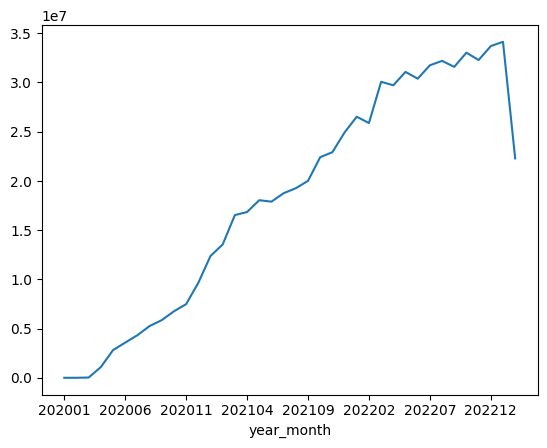

In [48]:
#Covid death trend on United States
df2_us["total_deaths"].plot()

<Axes: xlabel='year_month'>

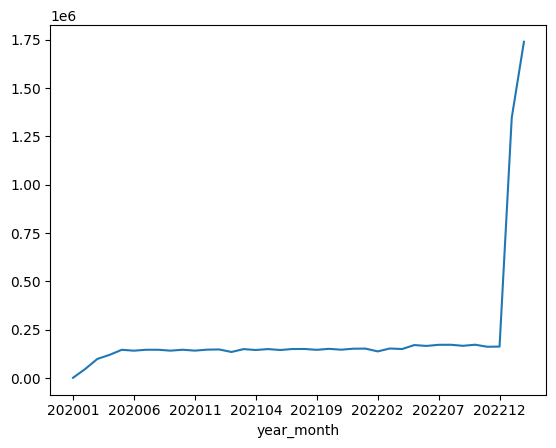

In [49]:
#Covid death trend on China
df2_cn['total_deaths'].plot()

<Axes: >

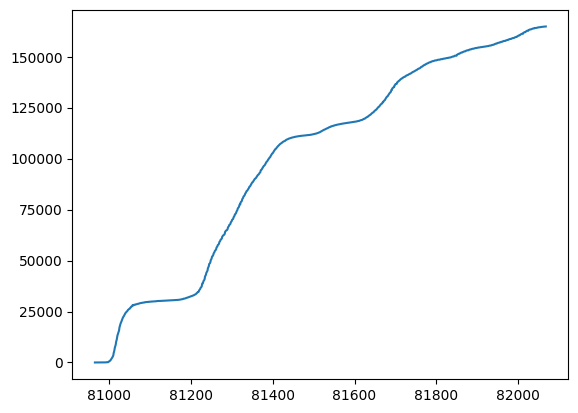

In [50]:
#Covid death trend on France
df1_fr['total_deaths'].plot()

<Axes: xlabel='year_month'>

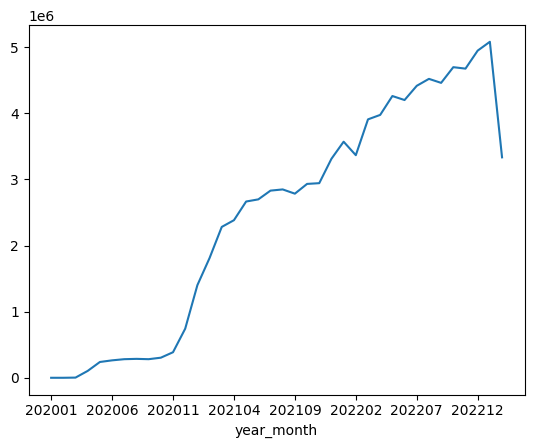

In [51]:
#Covid death trend on Germany
df2_gm['total_deaths'].plot()

In [63]:
#Filter Data by population details
df1_age = df1.groupby('location')['median_age', 'life_expetancy', 'aged_65_older',
       'aged_70_older', 'population'].max()

/var/folders/sw/tf9v_hds2vz_h8m2d7zpkpx00000gn/T/ipykernel_14006/2685365017.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_age = df1.groupby('location')['median_age', 'life_expetancy', 'aged_65_older',


In [64]:
df1_age

,median_age,life_expetancy,aged_65_older,aged_70_older,population
location,,,,,
China,38.7,NaN,10.641,5.929,1.425887e+09
France,42.0,NaN,19.718,13.079,6.781300e+07
Germany,46.6,NaN,21.453,15.957,8.336984e+07
United States,38.3,NaN,15.413,9.732,3.382899e+08
